<a href="https://colab.research.google.com/github/hetanshipatel/credit-card-fraud-detection/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading the Dataset**

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/hp/creditcard.csv')

# Display the first few rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **Data Preprocessing**

In [ ]:
# Checking for missing values
df.isnull().sum()
# Filling missing values with the mean (if any)
df = df.fillna(df.mean())

from sklearn.preprocessing import StandardScaler

# Feature Scaling (standardize 'Amount' and 'Time')
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop original 'Amount' and 'Time' columns
df = df.drop(['Amount', 'Time'], axis=1)

# Display the first few rows after scaling
df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


# **Class Balancing Using SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

# Separate the features and the target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
y_resampled.value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


,count
Class,
0,284315
1,284315


# **Exploratory Data Analysis (EDA)**

**1: Visualize the Class Distribution**

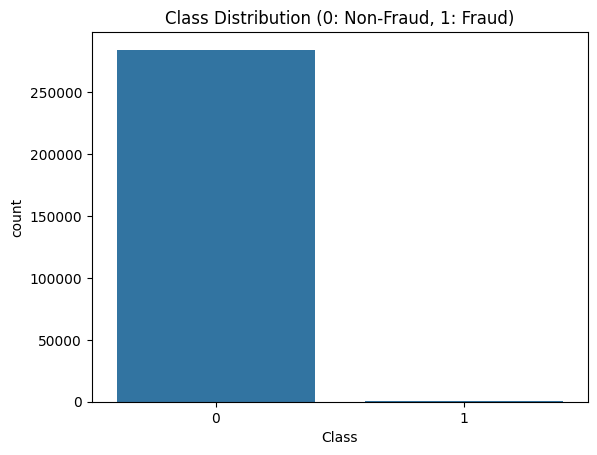

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the class distribution
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0: Non-Fraud, 1: Fraud)")
plt.show()

**2: Distribution of the Scaled Amount**

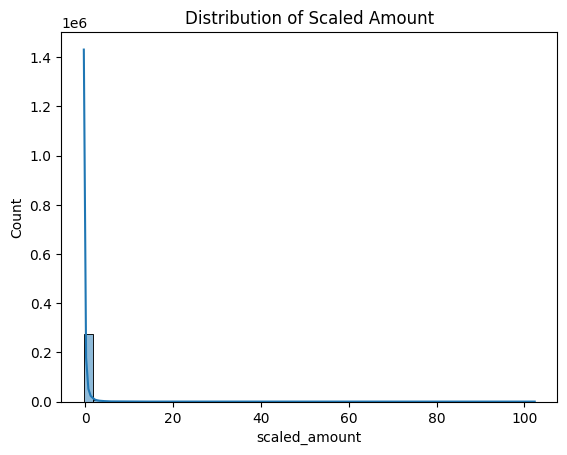

In [ ]:
# Visualizing the distribution of 'scaled_amount'
sns.histplot(df['scaled_amount'], kde=True, bins=50)
plt.title("Distribution of Scaled Amount")
plt.show()

**3: Visualizing the Distribution of Transaction Time**

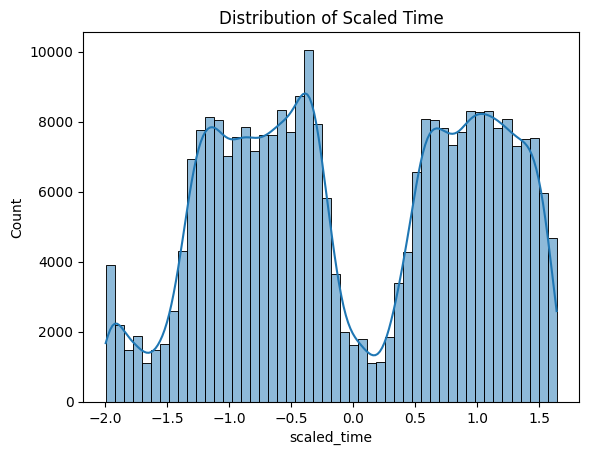

In [ ]:
# Visualizing the distribution of 'scaled_time'
sns.histplot(df['scaled_time'], kde=True, bins=50)
plt.title("Distribution of Scaled Time")
plt.show()

# **Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.21, random_state=42)

# Check the shapes of the splits
print("Training Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)

Training Features Shape: (449217, 30)
Test Features Shape: (119413, 30)


# **Training Different Models for Comparison**

**1: Random Forest Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluation metrics
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)

print("Random Forest - Accuracy: ", rf_accuracy)
print("Random Forest - Precision: ", rf_precision)
print("Random Forest - Recall: ", rf_recall)
print("Random Forest - F1 Score: ", rf_f1)


Random Forest - Accuracy:  0.9998995084287305
Random Forest - Precision:  0.9997993042547498
Random Forest - Recall:  1.0
Random Forest - F1 Score:  0.9998996420566688


**2: XGBoost Model**

In [ ]:
import xgboost as xgb

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
xgb_y_pred = xgb_model.predict(X_test)

# Evaluation metrics
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred)

print("XGBoost - Accuracy: ", xgb_accuracy)
print("XGBoost - Precision: ", xgb_precision)
print("XGBoost - Recall: ", xgb_recall)
print("XGBoost - F1 Score: ", xgb_f1)

XGBoost - Accuracy:  0.9997487710718264
XGBoost - Precision:  0.99949841163685
XGBoost - Recall:  1.0
XGBoost - F1 Score:  0.9997491429049251


**3: Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression
lr_model = LogisticRegression(random_state=42)

# Train the model
lr_model.fit(X_train, y_train)

# Predictions
lr_y_pred = lr_model.predict(X_test)

# Evaluation metrics
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_precision = precision_score(y_test, lr_y_pred)
lr_recall = recall_score(y_test, lr_y_pred)
lr_f1 = f1_score(y_test, lr_y_pred)

print("Logistic Regression - Accuracy: ", lr_accuracy)
print("Logistic Regression - Precision: ", lr_precision)
print("Logistic Regression - Recall: ", lr_recall)
print("Logistic Regression - F1 Score: ", lr_f1)

Logistic Regression - Accuracy:  0.9487744215453929
Logistic Regression - Precision:  0.9741469190125289
Logistic Regression - Recall:  0.9221478755436601
Logistic Regression - F1 Score:  0.947434454193127


# **Comparing Models**

In [ ]:
import pandas as pd

# Create a DataFrame to compare the models
comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Logistic Regression'],
    'Accuracy': [rf_accuracy, xgb_accuracy, lr_accuracy],
    'Precision': [rf_precision, xgb_precision, lr_precision],
    'Recall': [rf_recall, xgb_recall, lr_recall],
    'F1 Score': [rf_f1, xgb_f1, lr_f1]
})

# Display the comparison table
comparison_df = comparison_df.sort_values(by='F1 Score', ascending=False)
comparison_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.999900,0.999799,1.000000,0.999900
1,XGBoost,0.999749,0.999498,1.000000,0.999749
2,Logistic Regression,0.948774,0.974147,0.922148,0.947434


In [ ]:
# Find the model with the highest F1 score
best_model_index = comparison_df['F1 Score'].idxmax()
best_model_name = comparison_df.loc[best_model_index, 'Model']

print(f"The best model based on F1 Score is: {best_model_name}")

The best model based on F1 Score is: Random Forest


# **Saving the Best Model**

In [ ]:
import joblib

# Save the best model based on F1 Score (you can adjust this choice)
best_model = rf_model if rf_f1 == comparison_df.iloc[0]['F1 Score'] else \
             xgb_model if xgb_f1 == comparison_df.iloc[0]['F1 Score'] else \
             lr_model

# Save the best model
joblib.dump(best_model, '/content/drive/MyDrive/hp/fraud_detection_best_model.pkl')

# To load the model later:
# best_model = joblib.load('/content/drive/MyDrive/hp/fraud_detection_best_model.pkl')

['/content/drive/MyDrive/hp/fraud_detection_best_model.pkl']